In [2]:
import pandas as pd
import numpy as np

from sklearn.metrics import adjusted_mutual_info_score as AMI
from sklearn.metrics import silhouette_score

import seaborn as sns
import matplotlib.pyplot as plt


/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_79435/250584954.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
clus13 = pd.read_csv("output/cluster_13_111023.csv", index_col=0)
clusagg = pd.read_csv("output/cluster_stepmix_aggregate_010524.csv", index_col=0)
clusmulti = pd.read_csv("output/cluster_13_stepmix_multi_112923.csv", index_col=0)
clus13_na = pd.read_csv("output/cluster_13_ambiguousNaN_111023.csv", index_col=0)
tsne_comps = pd.read_csv("output/tsne_components.csv", index_col=0)

clus_A =  pd.read_csv('../clusterings/leo/final_aencoder_hdbscan_6.csv')
clus_B = pd.read_csv('../clusterings/chris/lowdim_spectral_ensemble_50_kmeans_joint_criterion_alpha_0.5_n_clusters_8.csv')

In [4]:
clusagg['cluster'] = clusagg['cluster'].add(-1)

In [5]:
df = pd.read_csv("../data/cleaned_data_SYMPTOMS_9_13_23.csv", index_col=0)
sympdf = df.loc[:, df.columns.str.startswith('Symptom_')]
sympdf.shape

(6031, 162)

In [6]:
AMI(clus13.cluster, clusagg.cluster)

0.7017100817253679

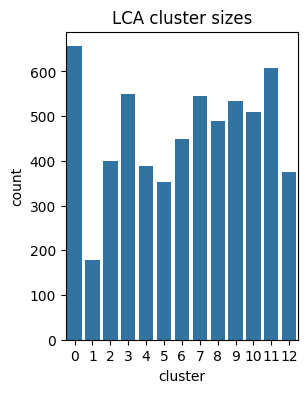

In [7]:
# plot value_counts
#clus13.plot.hist()
plt.figure(figsize=(3, 4))
sns.countplot(x=clus13['cluster'])
plt.title("LCA cluster sizes")
plt.savefig("figs/clustersize_13.pdf")

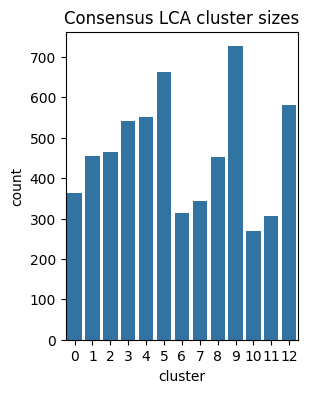

In [10]:
plt.figure(figsize=(3, 4))
sns.countplot(x=clusagg['cluster'])
plt.title("Consensus LCA cluster sizes")
plt.savefig("figs/clustersize_agg.pdf")

In [11]:
clus13_na.cluster.isna().sum()

108

In [12]:
nas = clus13[clus13_na.cluster.isna()]

In [13]:
(nas.cluster.value_counts()/clus13.cluster.value_counts()).median()

0.016623687603610243

In [14]:
tsne_comps['consensus'] = clusagg['cluster']
tsne_comps['LCA'] = clus13['cluster']
tsne_comps['Clustering A'] = clus_A['cluster']
tsne_comps['Clustering B'] = clus_B['cluster']

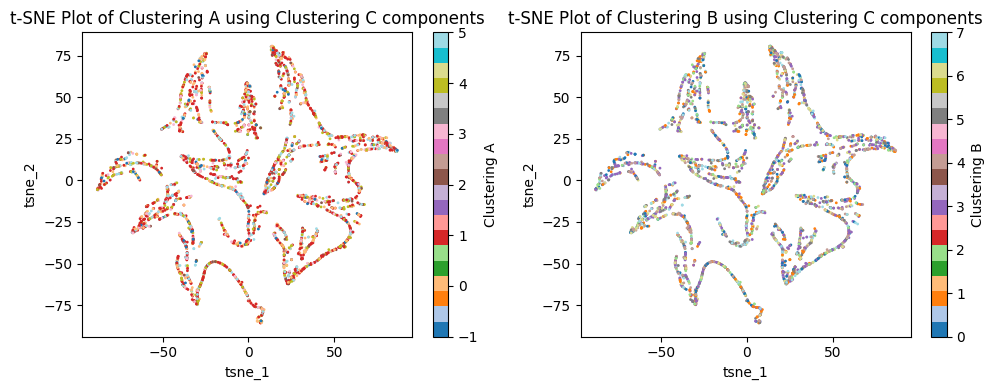

In [15]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns

tsne_comps.plot.scatter(x='tsne_1', y='tsne_2', c='Clustering A', colormap='tab20', title= "t-SNE Plot of Clustering A using Clustering C components",
                    s=1, ax = axs[0])
tsne_comps.plot.scatter(x='tsne_1', y='tsne_2', c='Clustering B', colormap='tab20', title= "t-SNE Plot of Clustering B using Clustering C components",
                    s=1, ax = axs[1])
# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()





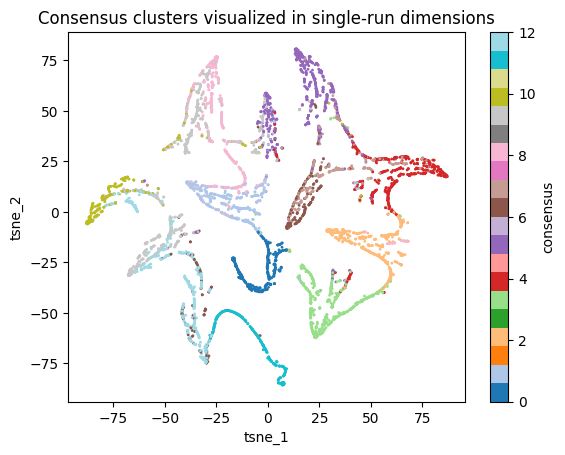

In [38]:
tsne_comps.plot.scatter(x='tsne_1', y='tsne_2', c='consensus', colormap='tab20', title= "Consensus clusters visualized in single-run dimensions",
                    s=1)

plt.savefig("figs/clusprob_tsne_stepmix_combined.pdf")

<Axes: title={'center': 't-SNE plot of LCA clusters'}, xlabel='tsne_1', ylabel='tsne_2'>

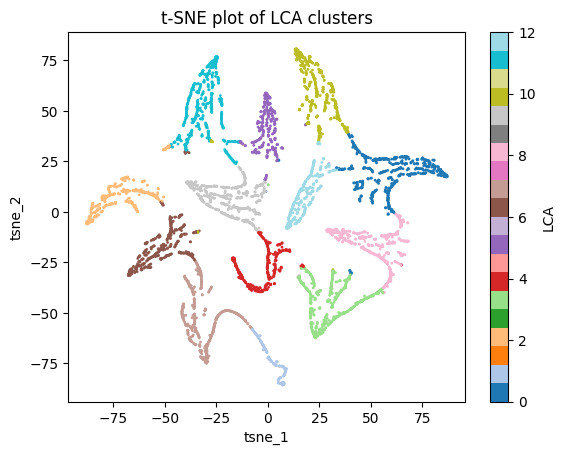

In [17]:
tsne_comps.plot.scatter(x='tsne_1', y='tsne_2', c='LCA', colormap='tab20', title= "t-SNE plot of LCA clusters",
                    s=1)

In [18]:
ensemble = pd.concat([clus13['cluster'].rename("clus13"), clusagg['cluster'].rename("clusagg")], axis=1)

In [19]:
overlaps_13_agg = ensemble.groupby("clusagg")['clus13'].value_counts().unstack(fill_value=0)
overlaps_13_agg = overlaps_13_agg.T

In [20]:
# clus13 -- clusagg
# 0 -- 5 and part of 8 
# 1 -- part of 12 
# 2 -- 10ish, all of 11, 1/4th of 13 
# 3 -- 4 
# 4 -- 1 
# 5 -- 6 and part of 10 
# 7 -- half of 13, half of 12, a third of 7
# 8 -- 3 
# 9 -- 2 and 1/4 of 9 
# 10 -- 6 and a piece of 8 but mostly 6 
# 11 -- 3/4 of 9, 40% of 10, a 10% of 11 
# 12 -- 7 and around a 3rd of 8

In [21]:
# row normalize
overlaps_13_agg = overlaps_13_agg.div(overlaps_13_agg.sum(axis=1), axis=0)


In [22]:
overlaps_13_agg.max(axis=1) 

clus13
0     0.757622
1     0.983146
2     0.571429
3     0.892532
4     0.922879
5     0.542614
6     0.601336
7     0.591912
8     0.902041
9     0.758427
10    0.805501
11    0.496711
12    0.505348
dtype: float64

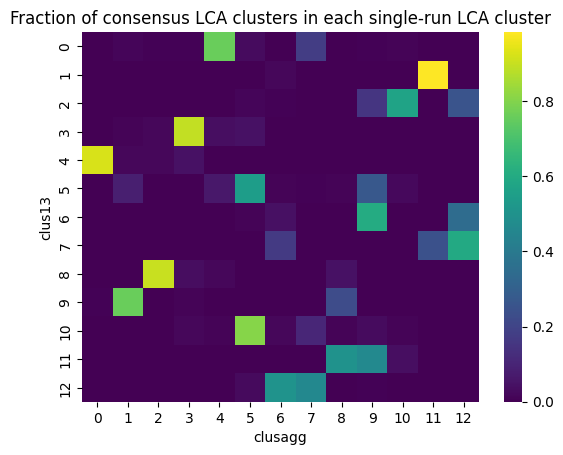

In [23]:
sns.heatmap(overlaps_13_agg, cmap="viridis")
#plt.ylabel("LCA clusters")
#plt.xlabel("Consensus LCA clusters")
plt.title("Fraction of consensus LCA clusters in each single-run LCA cluster")
plt.savefig("figs/overlaps_agg.pdf")

In [24]:
overlaps_13_agg.sum(axis=1)

clus13
0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
dtype: float64

In [25]:
overlaps_13_agg*100

clusagg,0,1,2,3,4,5,6,7,8,9,10,11,12
clus13,,,,,,,,,,,,,
0,0.000000,1.219512,0.762195,0.609756,75.762195,2.743902,0.000000,17.378049,0.000000,0.609756,0.914634,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.685393,0.000000,0.000000,0.000000,0.000000,98.314607,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,1.253133,0.501253,0.250627,0.250627,15.037594,57.142857,0.000000,25.563910
3,0.000000,0.910747,1.821494,89.253188,3.460838,4.553734,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,92.287918,1.799486,1.542416,4.370180,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,8.238636,0.000000,0.000000,6.250000,54.261364,0.852273,0.568182,1.136364,26.704545,1.988636,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.890869,4.008909,0.222717,0.000000,60.133630,0.222717,0.000000,34.521158
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.544118,0.000000,0.000000,0.000000,0.000000,24.264706,59.191176
8,0.204082,0.204082,90.204082,3.265306,1.632653,0.000000,0.000000,0.000000,4.489796,0.000000,0.000000,0.000000,0.000000


In [26]:
overlaps_13_agg_flipped = ensemble.groupby("clusagg")['clus13'].value_counts().unstack(fill_value=0)
overlaps_13_agg_flipped = overlaps_13_agg_flipped.div(overlaps_13_agg_flipped.sum(axis=1), axis=0)


In [27]:
overlaps_13_agg_flipped*100

clus13,0,1,2,3,4,5,6,7,8,9,10,11,12
clusagg,,,,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,98.626374,0.000000,0.000000,0.000000,0.274725,1.098901,0.000000,0.000000,0.000000
1,1.758242,0.000000,0.000000,1.098901,1.538462,6.373626,0.000000,0.000000,0.219780,89.010989,0.000000,0.000000,0.000000
2,1.077586,0.000000,0.000000,2.155172,1.293103,0.000000,0.000000,0.000000,95.258621,0.000000,0.000000,0.215517,0.000000
3,0.739372,0.000000,0.000000,90.573013,3.142329,0.000000,0.000000,0.000000,2.957486,1.109057,1.478743,0.000000,0.000000
4,90.036232,0.000000,0.000000,3.442029,0.000000,3.985507,0.000000,0.000000,1.449275,0.000000,0.905797,0.181159,0.000000
5,2.714932,0.000000,0.754148,3.770739,0.000000,28.808446,0.603318,0.000000,0.000000,0.000000,61.840121,0.000000,1.508296
6,0.000000,0.958466,0.638978,0.000000,0.000000,0.958466,5.750799,28.753994,0.000000,0.000000,2.555911,0.000000,60.383387
7,33.236152,0.000000,0.291545,0.000000,0.000000,0.583090,0.291545,0.000000,0.000000,0.000000,15.451895,0.000000,50.145773
8,0.000000,0.000000,0.221239,0.000000,0.000000,0.884956,0.000000,0.000000,4.867257,26.327434,0.884956,66.814159,0.000000


In [28]:
C0_in_agg4 = sympdf.loc[clusagg.index[clus13['cluster']==0][clusagg.index[clus13['cluster']==0].isin(clusagg.index[clusagg['cluster']==4])],:]

In [29]:
C0_in_agg4.mean(axis=0)


Symptom_Memory_short                  0.905433
Symptom_Memory_long                   0.293763
Symptom_Memory_no_new_memories        0.034205
Symptom_Memory_forget_tasks           0.062374
Symptom_Memory_other                  0.048290
                                        ...   
Symptom_SkinAllergy_shingles          0.016097
Symptom_PEM                           0.939638
Symptom_Fatigue                       0.995976
Symptom_Change_sensitivity_to_meds    0.152918
Symptom_New_allergies                 0.062374
Length: 162, dtype: float64

In [30]:
C0_not_agg4 = sympdf.loc[clusagg.index[clus13['cluster']==0][clusagg.index[clus13['cluster']==0].isin(clusagg.index[clusagg['cluster']!=4])],:]

In [31]:
diffs = C0_in_agg4.mean(axis=0)  - C0_not_agg4.mean(axis=0)


In [32]:
symps_of_interest = diffs.sort_values().head(6).index

In [33]:
C0_in_agg4.mean(axis=0)[symps_of_interest]

Symptom_Headaches_after_mental_exertion    0.219316
Symptom_Headaches_brain_pressure           0.229376
Symptom_Headaches_stiff_neck               0.388330
Symptom_Headaches_diffuse                  0.319920
Symptom_Eye_Vision_blurred_vision          0.183099
Symptom_Eye_Vision_sensitivity_to_light    0.191147
dtype: float64

In [34]:
C0_not_agg4.mean(axis=0)[symps_of_interest]

Symptom_Headaches_after_mental_exertion    0.465409
Symptom_Headaches_brain_pressure           0.452830
Symptom_Headaches_stiff_neck               0.610063
Symptom_Headaches_diffuse                  0.540881
Symptom_Eye_Vision_blurred_vision          0.402516
Symptom_Eye_Vision_sensitivity_to_light    0.396226
dtype: float64

In [35]:
C0_in_agg4['Symptom_Headaches_migraines'].mean()

0.22535211267605634

In [36]:
C0_not_agg4['Symptom_Headaches_migraines'].mean()
slp = ['Symptom_Difficulty_falling_asleep', 'Symptom_Waking_up_in_night', 'Symptom_Insomnia']

In [37]:
sympdf.loc[clus13.index[clus13['cluster']==9] ,slp].mean(axis=0)

Symptom_Difficulty_falling_asleep    0.000000
Symptom_Waking_up_in_night           0.000000
Symptom_Insomnia                     0.031835
dtype: float64

In [333]:
sympdf.loc[clus13.index[clus13['cluster']!=9] ,slp].mean(axis=0)

Symptom_Difficulty_falling_asleep    0.444970
Symptom_Waking_up_in_night           0.530289
Symptom_Insomnia                     0.757504
dtype: float64

In [340]:
mini = sympdf.loc[clus13.index[clus13['cluster']==4] ,:]

In [367]:
symps = {}
for pt in mini.index: 
    symps[pt] = mini.columns[mini.loc[pt,:] == 1].values

In [375]:
mini.loc[mini.sum(axis=1).idxmax(),:]

Symptom_Memory_short                  1.0
Symptom_Memory_long                   0.0
Symptom_Memory_no_new_memories        0.0
Symptom_Memory_forget_tasks           0.0
Symptom_Memory_other                  0.0
                                     ... 
Symptom_SkinAllergy_shingles          0.0
Symptom_PEM                           0.0
Symptom_Fatigue                       1.0
Symptom_Change_sensitivity_to_meds    0.0
Symptom_New_allergies                 0.0
Name: 12442, Length: 162, dtype: float64

In [378]:
symps[3850]

array(['Symptom_Memory_short', 'Symptom_Headaches_diffuse',
       'Symptom_Temp_lability', 'Symptom_Elevated_temp',
       'Symptom_Chills_flushing_sweats', 'Symptom_Acid_reflux',
       'Symptom_Dry_cough', 'Symptom_Cough_with_mucus',
       'Symptom_Coughing_up_blood', 'Symptom_Shortness_of_breath',
       'Symptom_Tightness_of_chest', 'Symptom_Pain_burning_chest',
       'Symptom_Difficulty_swallowing', 'Symptom_Changes_in_voice',
       'Symptom_Eye_Vision_dry_eyes', 'Symptom_Eye_Vision_bloodshot_eyes'],
      dtype=object)

In [382]:
ensemble = pd.concat([clus13['cluster'].rename("LCA"), clus_leo['cluster'].rename("Leo"), clus_chris['cluster'].rename("Chris")], axis=1)

In [384]:
# headmap for symptom groups for all three. 

In [394]:
df[df['Symptom_PEM']==0]['Cognitive_PEM_Severity'].isna().sum() ==len(df[df['Symptom_PEM']==0]['Cognitive_PEM_Severity'])

True

In [395]:
df[df['Symptom_PEM']==0]['Physical_PEM_Severity'].isna().sum() ==len(df[df['Symptom_PEM']==0]['Physical_PEM_Severity'])

True